### Gene Regulatory Network Dataset Selection

## 1. Introduction
Gene regulation plays a crucial role in defining cellular functions and responses. To model gene regulatory interactions effectively, we have selected the **GRAND (Gene Regulatory Network Database)** as our primary dataset. GRAND provides computationally inferred, context-specific **Gene Regulatory Networks (GRNs)** across various biological states, including normal tissues, cancer types, and cell lines.

## 2. Dataset Overview
GRAND is a publicly available database that contains **12,468 genome-scale networks**, covering:
- **36 human tissues** (normal tissue)
- **28 cancer types**
- **1,378 cell lines**
- **2,858 small-molecule perturbation networks**

Each network in GRAND is built using **PANDA, LIONESS, and related network inference methods**, which integrate:
- **Transcription factor (TF) binding motifs**
- **Protein-protein interactions (PPI)**
- **Gene co-expression data**
- **miRNA interactions** (for some networks)

## 3. Justification for Dataset Selection
### 3.1 Why GRAND for Gene Regulatory Network (GRN) Modeling?
Our study focuses on integrating gene regulatory networks into **Graph Attention Networks (GATs)** to improve interpretability and biological relevance in promoter identification. The reasons for selecting GRAND include:

#### **1. Availability of Normal Tissue Networks**
Unlike many GRN databases that focus on disease states, GRAND provides **regulatory networks for 36 normal human tissues** derived from the **GTEx dataset**. This ensures that our GAT model captures baseline regulatory interactions in non-pathological conditions.

#### **2. Large-Scale and Context-Specific Data**
GRAND offers **tissue- and condition-specific GRNs**, which are more biologically relevant compared to generic co-expression networks. This allows us to train our GAT model on **physiologically meaningful gene regulatory interactions**.

#### **3. High-Quality Inference Using Network Zoo Methods**
GRAND networks are inferred using established network reconstruction algorithms like:
- **PANDA** (for bulk gene regulatory networks)
- **LIONESS** (for individual sample networks)
- **OTTER & DRAGON** (for multi-omic integration)

These methods integrate diverse data sources to produce **more accurate and biologically interpretable regulatory networks**.

#### **4. Scalability and Computational Efficiency**
GRAND provides precomputed GRNs, avoiding the need for time-intensive network inference from scratch. This allows us to focus on **developing and refining our GAT model**, rather than spending computational resources on network reconstruction.

## 4. Data Processing Pipeline
To integrate GRAND networks into our GAT model, we will follow these steps:
1. **Data Acquisition:** Download tissue-specific GRNs from GRAND.
2. **Preprocessing:** Convert networks into adjacency matrices for GAT input.
3. **Feature Engineering:** Extract node and edge attributes, such as TF binding strength and gene co-expression scores.
4. **Graph Construction:** Construct directed graphs where nodes represent genes and edges represent regulatory interactions.
5. **Model Training:** Train GATs using tissue-specific GRNs to predict gene regulation patterns.

## 5. Conclusion
GRAND is an optimal choice for our study due to its **high-quality, large-scale, and context-specific regulatory networks**. By leveraging these networks, we can enhance the interpretability and performance of our **GAT-based promoter prediction model**, ensuring biologically meaningful insights.

## Download the dataset

In [ ]:
import os
import requests
from tqdm import tqdm

def download_file(url, save_dir):
    filename = url.split("/")[-1]
    file_path = os.path.join(save_dir, filename)
    
    response = requests.get(url, stream=True)
    response.raise_for_status()
    
    total_size = int(response.headers.get('content-length', 0))
    block_size = 1024  # 1 KB
    
    with open(file_path, 'wb') as file, tqdm(
        desc=filename,
        total=total_size,
        unit='B',
        unit_scale=True,
        unit_divisor=1024,
    ) as bar:
        for data in response.iter_content(block_size):
            file.write(data)
            bar.update(len(data))

def main():
    urls = [
        "https://granddb.s3.amazonaws.com/tissues/networks/Adipose_Subcutaneous.csv",
        "https://granddb.s3.amazonaws.com/tissues/networks/Adipose_Visceral.csv",
        "https://granddb.s3.amazonaws.com/tissues/networks/Adrenal_Gland.csv",
        "https://granddb.s3.amazonaws.com/tissues/networks/Artery_Aorta.csv",
        "https://granddb.s3.amazonaws.com/tissues/networks/Artery_Coronary.csv",
        "https://granddb.s3.amazonaws.com/tissues/networks/Artery_Tibial.csv",
        "https://granddb.s3.amazonaws.com/tissues/networks/Brain_Other.csv",
        "https://granddb.s3.amazonaws.com/tissues/networks/Brain_Cerebellum.csv",
        "https://granddb.s3.amazonaws.com/tissues/networks/Brain_Basal_Ganglia.csv",
        "https://granddb.s3.amazonaws.com/tissues/networks/Breast.csv",
        "https://granddb.s3.amazonaws.com/tissues/networks/Colon_Sigmoid.csv",
        "https://granddb.s3.amazonaws.com/tissues/networks/Colon_Transverse.csv",
        "https://granddb.s3.amazonaws.com/tissues/networks/Gastroesophageal_Junction.csv",
        "https://granddb.s3.amazonaws.com/tissues/networks/Esophagus_Mucosa.csv",
        "https://granddb.s3.amazonaws.com/tissues/networks/Esophagus_Muscularis.csv",
        "https://granddb.s3.amazonaws.com/tissues/networks/Heart_Atrial_Appendage.csv",
        "https://granddb.s3.amazonaws.com/tissues/networks/Heart_Left_Ventricle.csv",
        "https://granddb.s3.amazonaws.com/tissues/networks/Kidney_Cortex.csv",
        "https://granddb.s3.amazonaws.com/tissues/networks/Liver.csv",
        "https://granddb.s3.amazonaws.com/tissues/networks/Lung.csv",
        "https://granddb.s3.amazonaws.com/tissues/networks/Minor_Salivary_Gland.csv",
        "https://granddb.s3.amazonaws.com/tissues/networks/Skeletal_Muscle.csv",
        "https://granddb.s3.amazonaws.com/tissues/networks/Tibial_Nerve.csv",
        "https://granddb.s3.amazonaws.com/tissues/networks/Ovary.csv",
        "https://granddb.s3.amazonaws.com/tissues/networks/Pancreas.csv",
        "https://granddb.s3.amazonaws.com/tissues/networks/Pituitary.csv",
        "https://granddb.s3.amazonaws.com/tissues/networks/Prostate.csv",
        "https://granddb.s3.amazonaws.com/tissues/networks/Skin.csv",
        "https://granddb.s3.amazonaws.com/tissues/networks/Intestine_Terminal_Ileum.csv",
        "https://granddb.s3.amazonaws.com/tissues/networks/Spleen.csv",
        "https://granddb.s3.amazonaws.com/tissues/networks/Stomach.csv",
        "https://granddb.s3.amazonaws.com/tissues/networks/Testis.csv",
        "https://granddb.s3.amazonaws.com/tissues/networks/Thyroid.csv",
        "https://granddb.s3.amazonaws.com/tissues/networks/Uterus.csv",
        "https://granddb.s3.amazonaws.com/tissues/networks/Vagina.csv",
        "https://granddb.s3.amazonaws.com/tissues/networks/Whole_Blood.csv"
    ]
    
    save_dir = "GRAND_networks"
    os.makedirs(save_dir, exist_ok=True)
    
    for url in urls:
        download_file(url, save_dir)

main()


# Sample Data Anlysis 

First few rows of the dataframe:
      ENSG00000000003  ENSG00000000005  ENSG00000000419  ENSG00000000457  \
AHR         -0.778280         0.442040         0.846600         0.926070   
AIRE        -0.182220        -0.097726         3.529900        -0.066236   
ALX1         0.041118        -0.616610        -0.165410        -0.078819   
ALX3        -0.601450        -0.455430        -1.264000        -0.983400   
ALX4         5.155200         0.301370        -0.037259        -0.496100   

      ENSG00000000460  ENSG00000000938  ENSG00000000971  ENSG00000001036  \
AHR           0.85729        -0.577450         -0.24383          3.66670   
AIRE          3.98920        -1.345300          3.24400         -0.98514   
ALX1          0.32050         0.077539          3.79850         -0.42067   
ALX3         -1.07890        -0.823360         -0.38096          4.69490   
ALX4         -0.71921        -0.585150         -0.12711         -0.63439   

      ENSG00000001084  ENSG00000001167  ...  ENSG0000

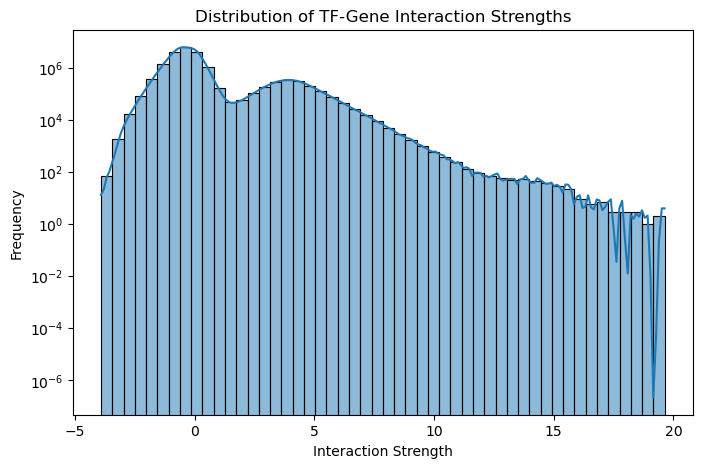

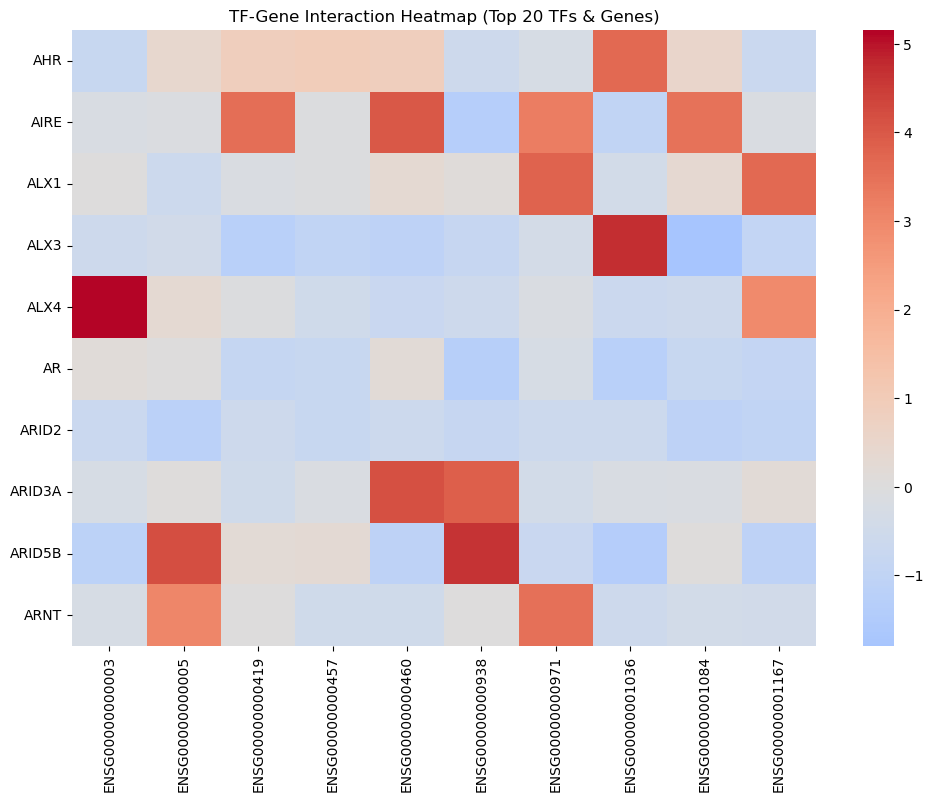

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
file_path = 'GRAND_networks/Lung.csv'
df = pd.read_csv(file_path, header=0, index_col=0)

# Print the first few rows of the dataframe
print("First few rows of the dataframe:")
print(df.head())

# Check for missing values
missing_values = df.isnull().sum().sum()
print(f"\nMissing values in dataset: {missing_values}")
if missing_values > 0:
    print("Warning: Dataset contains missing values! Consider handling them before analysis.")

# Convert to NumPy array for efficiency
matrix = df.values  

# Compute summary statistics
num_tfs, num_genes = df.shape
num_interactions = np.count_nonzero(matrix)
num_positive = np.sum(matrix > 0)
num_negative = np.sum(matrix < 0)
num_zero = np.sum(matrix == 0)
sparsity = (num_zero / (num_tfs * num_genes)) * 100
mean_interaction = np.mean(matrix[matrix != 0])
std_interaction = np.std(matrix[matrix != 0])

print("\nSummary Report:")
print(f"Number of Transcription Factors (TFs): {num_tfs}")
print(f"Number of Genes: {num_genes}")
print(f"Total number of interactions: {num_interactions}")
print(f"Number of positive interactions: {num_positive}")
print(f"Number of negative interactions: {num_negative}")
print(f"Number of zero interactions: {num_zero} ({sparsity:.2f}% sparsity)")
print(f"Mean interaction strength (non-zero): {mean_interaction:.4f}")
print(f"Std deviation of interaction strength (non-zero): {std_interaction:.4f}")

# Describe the data to get basic statistics
print("\nDescriptive Statistics:")
print(df.describe())

# Identify the top 10 TFs with the most interactions
interaction_counts_tfs = (df != 0).sum(axis=1)
top_tfs = interaction_counts_tfs.nlargest(10)

print("\nTop 10 Transcription Factors with Most Interactions:")
print(top_tfs)

# Identify the top 10 genes with the most interactions
interaction_counts_genes = (df != 0).sum(axis=0)
top_genes = interaction_counts_genes.nlargest(10)for

print("\nTop 10 Genes with Most Interactions:")
print(top_genes)

# Histogram of interaction strengths (excluding zero)
plt.figure(figsize=(8, 5))
sns.histplot(matrix[matrix != 0], bins=50, kde=True)
plt.xlabel("Interaction Strength")
plt.ylabel("Frequency")
plt.title("Distribution of TF-Gene Interaction Strengths")
plt.yscale("log")  # Log scale for better visibility of lower frequencies
plt.show()

# Heatmap of top 20 TFs and top 20 genes (if applicable)
top_tfs_list = top_tfs.index[:20]
top_genes_list = top_genes.index[:20]

if len(top_tfs_list) > 0 and len(top_genes_list) > 0:
    plt.figure(figsize=(12, 8))
    sns.heatmap(df.loc[top_tfs_list, top_genes_list], cmap="coolwarm", center=0, annot=False)
    plt.title("TF-Gene Interaction Heatmap (Top 20 TFs & Genes)")
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.show()
else:
    print("Not enough data for heatmap visualization.")


**Observation of Lung.csv Dataset**

**1. Data Preview:**
The first few rows of the dataset indicate that the dataset contains gene expression interaction values between transcription factors (TFs) and genes. The dataset is structured with TFs as row indices and genes as column headers. A sample of the data is as follows:

|      | ENSG00000000003 | ENSG00000000005 | ENSG00000000419 | ENSG00000000457 | ENSG00000000460 |
|------|----------------|----------------|----------------|----------------|----------------|
| AHR  | -0.778280      | 0.442040       | 0.846600       | 0.926070       | 0.857290       |
| AIRE | -0.182220      | -0.097726      | 3.529900       | -0.066236      | 3.989200       |
| ALX1 | 0.041118       | -0.616610      | -0.165410      | -0.078819      | 0.320500       |
| ALX3 | -0.601450      | -0.455430      | -1.264000      | -0.983400      | -1.078900      |
| ALX4 | 5.155200       | 0.301370       | -0.037259      | -0.496100      | -0.719210      |

The dataset consists of 30243 genes (columns) and 644 transcription factors (rows).

**2. Missing Data:**
The dataset does not contain any missing values.

**3. Summary Statistics:**
- **Number of Transcription Factors (TFs):** 644
- **Number of Genes:** 30243
- **Total number of interactions:** 19,476,492
- **Number of positive interactions:** 5,640,033
- **Number of negative interactions:** 13,836,459
- **Number of zero interactions:** 0 (0.00% sparsity)
- **Mean interaction strength (non-zero values):** -0.0026
- **Standard deviation of interaction strength (non-zero values):** 1.4463

**4. Descriptive Statistics:**
Below are summary statistics for a few representative genes:

| Statistic | ENSG00000000003 | ENSG00000000005 | ENSG00000000419 | ENSG00000000457 | ENSG00000000460 |
|-----------|----------------|----------------|----------------|----------------|----------------|
| Count    | 644            | 644            | 644            | 644            | 644            |
| Mean     | 0.000988       | -0.005883      | -0.015953      | -0.007323      | 0.028999       |
| Std Dev  | 1.424952       | 1.387025       | 1.451393       | 1.491341       | 1.492894       |
| Min      | -2.214800      | -2.555600      | -2.458800      | -2.221700      | -2.780400      |
| 25%      | -0.718257      | -0.683225      | -0.702820      | -0.684810      | -0.713527      |
| 50%      | -0.287940      | -0.316210      | -0.330795      | -0.308640      | -0.329620      |
| 75%      | 0.066311       | 0.083288       | 0.052763       | 0.066837       | 0.100324       |
| Max      | 7.654900       | 6.670900       | 9.734600       | 10.203000      | 8.167100       |

**5. Transcription Factors with the Most Interactions:**
The top 10 transcription factors interact with all 30243 genes:

| Transcription Factor | Number of Interactions |
|----------------------|-----------------------|
| AHR                 | 30243                  |
| AIRE                | 30243                  |
| ALX1                | 30243                  |
| ALX3                | 30243                  |
| ALX4                | 30243                  |
| AR                  | 30243                  |
| ARID2               | 30243                  |
| ARID3A              | 30243                  |
| ARID5B              | 30243                  |
| ARNT                | 30243                  |

**6. Genes with the Most Interactions:**
The top 10 genes interact with all 644 transcription factors:

| Gene ID           | Number of Interactions |
|------------------|-----------------------|
| ENSG00000000003  | 644                   |
| ENSG00000000005  | 644                   |
| ENSG00000000419  | 644                   |
| ENSG00000000457  | 644                   |
| ENSG00000000460  | 644                   |
| ENSG00000000938  | 644                   |
| ENSG00000000971  | 644                   |
| ENSG00000001036  | 644                   |
| ENSG00000001084  | 644                   |
| ENSG00000001167  | 644                   |

**Conclusion:**
The dataset is dense, with all transcription factors interacting with all genes. The distribution of interaction strengths appears to be balanced, with no missing values. This structure ensures comprehensive interaction analysis and provides a strong foundation for downstream machine learning and statistical modeling.

The next steps involve extending this analysis iteratively across all available datasets.

Processed Adipose_Subcutaneous.csv, saved summary to Processed_Summaries/Adipose_Subcutaneous_summary.csv
Processed Adipose_Visceral.csv, saved summary to Processed_Summaries/Adipose_Visceral_summary.csv
Processed Adrenal_Gland.csv, saved summary to Processed_Summaries/Adrenal_Gland_summary.csv
Processed Artery_Aorta.csv, saved summary to Processed_Summaries/Artery_Aorta_summary.csv
Processed Artery_Coronary.csv, saved summary to Processed_Summaries/Artery_Coronary_summary.csv
Processed Artery_Tibial.csv, saved summary to Processed_Summaries/Artery_Tibial_summary.csv
Processed Brain_Basal_Ganglia.csv, saved summary to Processed_Summaries/Brain_Basal_Ganglia_summary.csv
Processed Brain_Cerebellum.csv, saved summary to Processed_Summaries/Brain_Cerebellum_summary.csv
Processed Brain_Other.csv, saved summary to Processed_Summaries/Brain_Other_summary.csv
Processed Breast.csv, saved summary to Processed_Summaries/Breast_summary.csv
Processed Colon_Sigmoid.csv, saved summary to Processed_Su

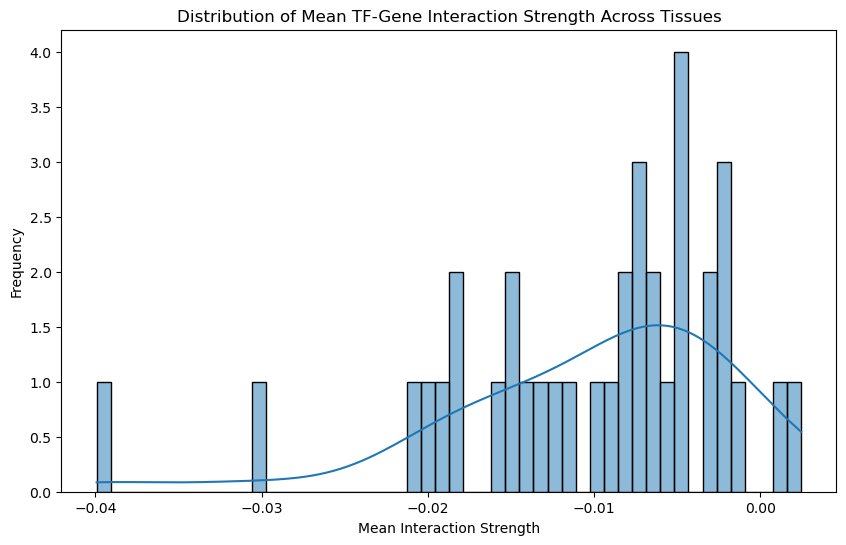

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

data_dir = "GRAND_networks/"
output_dir = "Processed_Summaries/"
os.makedirs(output_dir, exist_ok=True)

# List of tissue files
tissue_files = [
    "Adipose_Subcutaneous.csv", "Adipose_Visceral.csv", "Adrenal_Gland.csv",
    "Artery_Aorta.csv", "Artery_Coronary.csv", "Artery_Tibial.csv",
    "Brain_Basal_Ganglia.csv", "Brain_Cerebellum.csv", "Brain_Other.csv",
    "Breast.csv", "Colon_Sigmoid.csv", "Colon_Transverse.csv",
    "Esophagus_Mucosa.csv", "Esophagus_Muscularis.csv", "Gastroesophageal_Junction.csv",
    "Heart_Atrial_Appendage.csv", "Heart_Left_Ventricle.csv", "Intestine_Terminal_Ileum.csv",
    "Kidney_Cortex.csv", "Liver.csv", "Lung.csv", "Minor_Salivary_Gland.csv",
    "Ovary.csv", "Pancreas.csv", "Pituitary.csv", "Prostate.csv",
    "Skeletal_Muscle.csv", "Skin.csv", "Spleen.csv", "Stomach.csv",
    "Testis.csv", "Thyroid.csv", "Tibial_Nerve.csv", "Uterus.csv",
    "Vagina.csv", "Whole_Blood.csv"
]

def process_tissue_file(file_name):
    """Process a single tissue file and save the summary as a CSV."""
    file_path = os.path.join(data_dir, file_name)
    output_path = os.path.join(output_dir, file_name.replace(".csv", "_summary.csv"))
    
    df = pd.read_csv(file_path, header=0, index_col=0)
    matrix = df.values  
    
    # Compute statistics
    num_tfs, num_genes = df.shape
    num_interactions = np.count_nonzero(matrix)
    num_positive = np.sum(matrix > 0)
    num_negative = np.sum(matrix < 0)
    num_zero = np.sum(matrix == 0)
    sparsity = (num_zero / (num_tfs * num_genes)) * 100
    mean_interaction = np.mean(matrix[matrix != 0]) if num_interactions > 0 else 0
    std_interaction = np.std(matrix[matrix != 0]) if num_interactions > 0 else 0
    
    # Save summary
    summary_df = pd.DataFrame([[
        file_name.replace(".csv", ""), num_tfs, num_genes, num_interactions, 
        num_positive, num_negative, num_zero, sparsity, mean_interaction, std_interaction
    ]], columns=[
        "Tissue", "Num_TFs", "Num_Genes", "Total_Interactions", "Positive_Interactions",
        "Negative_Interactions", "Zero_Interactions", "Sparsity(%)", 
        "Mean_Interaction", "Std_Interaction"matimatically
    ])
    summary_df.to_csv(output_path, index=False)
    print(f"Processed {file_name}, saved summary to {output_path}")

def generate_master_report():
    """Collect all summary CSVs and generate a master report."""
    summary_files = [f for f in os.listdir(output_dir) if f.endswith("_summary.csv")]
    all_summaries = pd.concat([pd.read_csv(os.path.join(output_dir, f)) for f in summary_files])
    
    # Save master summary
    master_summary_path = os.path.join(output_dir, "Master_Summary.csv")
    all_summaries.to_csv(master_summary_path, index=False)
    print(f"Master summary saved to {master_summary_path}")
    
    # Visualization
    plt.figure(figsize=(10, 6))
    sns.histplot(all_summaries["Mean_Interaction"], bins=50, kde=True)
    plt.xlabel("Mean Interaction Strength")
    plt.ylabel("Frequency")
    plt.title("Distribution of Mean TF-Gene Interaction Strength Across Tissues")
    plt.show()

# Process each file separately
for tissue in tissue_files:
    process_tissue_file(tissue)

# Generate master report
generate_master_report()

### Load the Master Summary File

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the master summary file
master_summary_path = "Processed_Summaries/Master_Summary.csv"
df = pd.read_csv(master_summary_path)

# Display basic statistics
print("Dataset Overview:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Tissue                 36 non-null     object 
 1   Num_TFs                36 non-null     int64  
 2   Num_Genes              36 non-null     int64  
 3   Total_Interactions     36 non-null     int64  
 4   Positive_Interactions  36 non-null     int64  
 5   Negative_Interactions  36 non-null     int64  
 6   Zero_Interactions      36 non-null     int64  
 7   Sparsity(%)            36 non-null     float64
 8   Mean_Interaction       36 non-null     float64
 9   Std_Interaction        36 non-null     float64
dtypes: float64(3), int64(6), object(1)
memory usage: 2.9+ KB
None

Summary Statistics:
       Num_TFs  Num_Genes  Total_Interactions  Positive_Interactions  \
count     36.0       36.0                36.0           3.600000e+01   
mean     644.0    30243

### **Dataset Overview and Observations**  

The dataset consists of **36 tissues**, each with **644 transcription factors (TFs)** and **30,243 target genes**, resulting in **19,476,492 total interactions** across all tissues. The dataset contains **both positive and negative interactions**, with no zero interactions recorded.  

#### **Key Observations:**  
1. **Uniform TF and Gene Counts:**  
   - Every tissue has the same number of **644 TFs** and **30,243 genes**, suggesting a standardized dataset without variation in TF-gene presence across tissues.  

2. **Interaction Distribution:**  
   - The number of **positive interactions** varies between **4.15M and 7.02M**, while **negative interactions** range from **12.46M to 15.33M**, showing a predominance of negative interactions.  
   - The **mean interaction strength** is slightly negative (-0.0102 on average), indicating that most interactions lean toward repression rather than activation.  

3. **Sparsity Issue:**  
   - The reported **sparsity percentage is 0% for all tissues**, suggesting that the dataset is densely populated with interactions and does not contain missing TF-gene relationships.  

4. **Variation in Interaction Strengths:**  
   - The **standard deviation of interaction strengths** is around **1.44**, meaning there is some fluctuation in interaction weights across tissues.  

#### **Implications:**  
- The consistency in TF and gene counts across tissues indicates **standardized data processing** rather than tissue-specific variations.  
- The predominance of negative interactions suggests **TFs may primarily act as repressors** in the given dataset.  
- The lack of sparsity might indicate **a fully connected network**, which may require further filtering or normalization for meaningful biological insights.  

In [13]:
import pandas as pd
import glob
import warnings

# Suppress DtypeWarning
warnings.simplefilter(action='ignore', category=pd.errors.DtypeWarning)

# Path to tissue CSV files 
tissue_files = glob.glob("GRAND_networks/*.csv")

# Initialize a set to store unique gene IDs
unique_genes = set()

# Iterate over each file and extract unique genes from the first row
for file in tissue_files:
    df = pd.read_csv(file, header=None, low_memory=False)  # Suppress DtypeWarning
    if df.shape[1] > 1:  # Ensure the file is not empty or malformed
        gene_ids = df.iloc[0, 1:].dropna().astype(str)  # Exclude the first cell and convert to string
        unique_genes.update(gene_ids)

# Convert set to DataFrame
unique_genes_df = pd.DataFrame(sorted(unique_genes), columns=["Gene_ID"])

# Display basic info
print(f"Total unique genes collected: {len(unique_genes)}")
print(unique_genes_df.head())

# Save to CSV
unique_genes_df.to_csv("unique_gene_list.csv", index=False)


Total unique genes collected: 30243
           Gene_ID
0  ENSG00000000003
1  ENSG00000000005
2  ENSG00000000419
3  ENSG00000000457
4  ENSG00000000460


In [5]:
import pandas as pd

# Load the saved unique gene list
unique_genes_df = pd.read_csv("unique_gene_list.csv", dtype=str)

# Rename the column if necessary to match expected format
if "Gene_ID" in unique_genes_df.columns:
    unique_genes_df = unique_genes_df.rename(columns={"Gene_ID": "gene_id"})

# Load the promoter dataset
promoter_df = pd.read_csv(
    "/home/pc/Desktop/0_DATASET/BWDFM/data/raw/human_genome_annotation/updated_promoter_features_clean.csv",
    sep="\t",
    dtype=str
)

# Extract gene IDs from promoter dataset
promoter_gene_ids = promoter_df.iloc[:, 0].str.extract(r'gene_id\s+"(ENSG\d+)"')[0].dropna().unique()

# Extract unique gene IDs from the CSV
unique_gene_ids = unique_genes_df["gene_id"].dropna().unique()

# Convert to sets for comparison
promoter_gene_set = set(promoter_gene_ids)
unique_gene_set = set(unique_gene_ids)

# Find genes in both datasets
genes_in_both = promoter_gene_set & unique_gene_set

# Genes in promoter but not in unique gene list
genes_only_in_promoter = promoter_gene_set - unique_gene_set

# Genes in unique gene list but not in promoter
genes_only_in_unique_list = unique_gene_set - promoter_gene_set

# Print the results with descriptive text
print(f"Number of genes found in both datasets: {len(genes_in_both)}")
print(f"Number of genes only in the promoter dataset: {len(genes_only_in_promoter)}")
print(f"Number of genes only in the Gene Regulatory Network Dataset unique gene list: {len(genes_only_in_unique_list)}")


Number of genes found in both datasets: 17787
Number of genes only in the promoter dataset: 2241
Number of genes only in the Gene Regulatory Network Dataset unique gene list: 12456
